# 📊 05. Trajectory EDA & Validation

## Objective
Validate the `trajectory_ml_ready.csv` dataset and explore the relationships between features and the `Financial_Trajectory` target.

## Key Questions
1.  **Class Balance:** Is the dataset imbalanced? (Are "Declining" schools rare?)
2.  **Correlations:** Which features are most strongly correlated with the target?
3.  **Separability:** Can we visually separate the classes using 2D plots?
4.  **Data Quality:** Are there any remaining missing values or outliers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported")

✅ Libraries imported


## 1. Load Data

In [2]:
try:
    df = pd.read_csv('trajectory_ml_ready.csv')
    print(f"✅ Loaded dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Dataset not found! Run 04_Trajectory_Feature_Engineering.ipynb first.")

✅ Loaded dataset: (12054, 20)


## 2. Class Distribution Analysis
Check if we have a severe class imbalance problem.

/var/folders/k2/4ym6nvq14tl_bnrkhhxz2gk40000gn/T/ipykernel_4862/50965580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Target_Trajectory', data=df, order=['Declining', 'Stable', 'Improving'], palette='viridis')


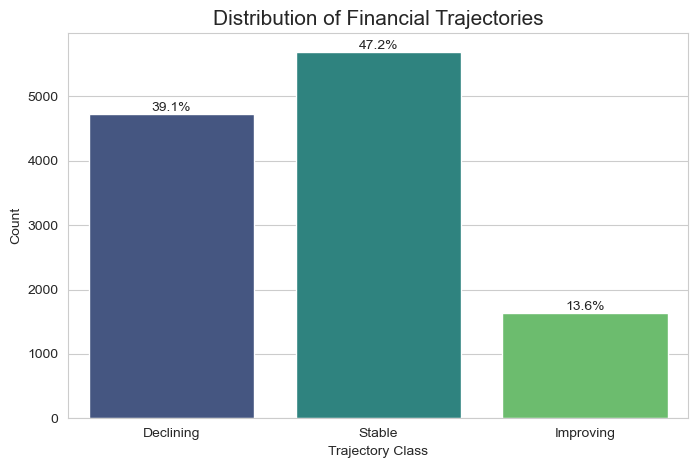

Target_Trajectory
Stable       0.472374
Declining    0.391488
Improving    0.136137
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Target_Trajectory', data=df, order=['Declining', 'Stable', 'Improving'], palette='viridis')
plt.title('Distribution of Financial Trajectories', fontsize=15)
plt.xlabel('Trajectory Class')
plt.ylabel('Count')

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print(df['Target_Trajectory'].value_counts(normalize=True))

## 3. Correlation Analysis
Identify which features drive the trajectory.

/var/folders/k2/4ym6nvq14tl_bnrkhhxz2gk40000gn/T/ipykernel_4862/205382261.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


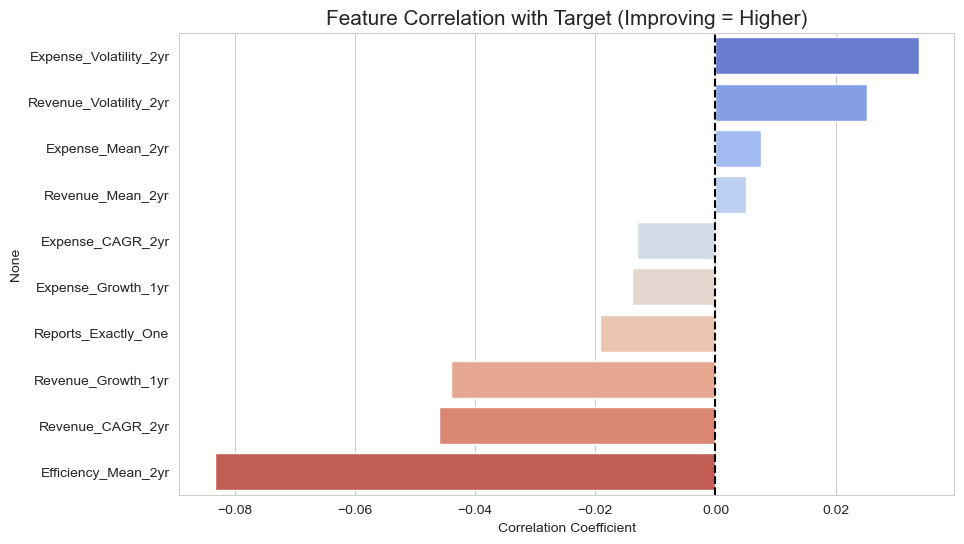

Top Positive Correlations:
Expense_Volatility_2yr    0.033902
Revenue_Volatility_2yr    0.025274
Expense_Mean_2yr          0.007587
Name: Target_Label, dtype: float64

Top Negative Correlations:
Revenue_Growth_1yr    -0.044099
Revenue_CAGR_2yr      -0.046114
Efficiency_Mean_2yr   -0.083424
Name: Target_Label, dtype: float64


In [4]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns and raw totals (we care about rates/ratios)
cols_to_exclude = ['UNITID', 'Year', 'Grand Total Revenue', 'Grand Total Expenses', 'Total_Athletes', 'Target_Label']
analysis_cols = [c for c in numeric_cols if c not in cols_to_exclude]

# Add Target_Label back for correlation
analysis_cols.append('Target_Label')

corr_matrix = df[analysis_cols].corr()

# Plot correlation with Target
plt.figure(figsize=(10, 6))
target_corr = corr_matrix['Target_Label'].drop('Target_Label').sort_values(ascending=False)
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Feature Correlation with Target (Improving = Higher)', fontsize=15)
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='black', linestyle='--')
plt.show()

print("Top Positive Correlations:")
print(target_corr.head(3))
print("\nTop Negative Correlations:")
print(target_corr.tail(3))

## 4. Feature Distributions by Class
Visualize how key features differ across trajectories.

/var/folders/k2/4ym6nvq14tl_bnrkhhxz2gk40000gn/T/ipykernel_4862/2212166349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target_Trajectory', y=feature, data=df, order=['Declining', 'Stable', 'Improving'], palette='viridis')
/var/folders/k2/4ym6nvq14tl_bnrkhhxz2gk40000gn/T/ipykernel_4862/2212166349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target_Trajectory', y=feature, data=df, order=['Declining', 'Stable', 'Improving'], palette='viridis')
/var/folders/k2/4ym6nvq14tl_bnrkhhxz2gk40000gn/T/ipykernel_4862/2212166349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

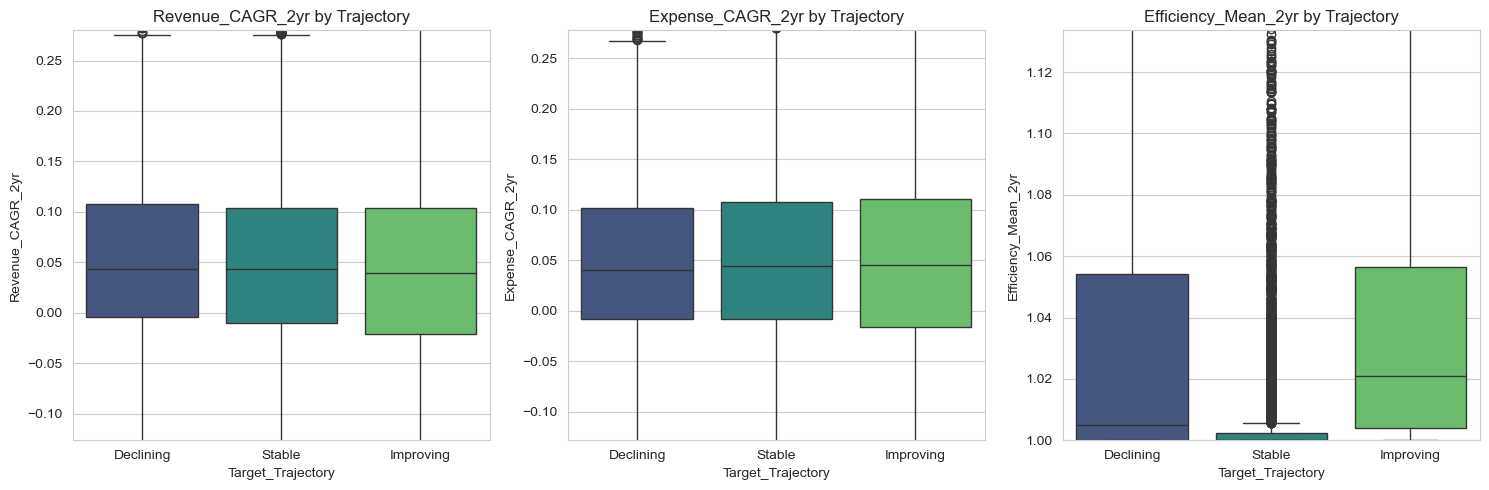

In [5]:
key_features = ['Revenue_CAGR_2yr', 'Expense_CAGR_2yr', 'Efficiency_Mean_2yr']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Target_Trajectory', y=feature, data=df, order=['Declining', 'Stable', 'Improving'], palette='viridis')
    plt.title(f'{feature} by Trajectory')
    # Limit y-axis to remove extreme outliers for better visualization
    lower, upper = df[feature].quantile([0.05, 0.95])
    plt.ylim(lower, upper)

plt.tight_layout()
plt.show()

## 5. Temporal Stability
Does the distribution of trajectories change over time? (e.g., COVID impact)

<Figure size 1200x600 with 0 Axes>

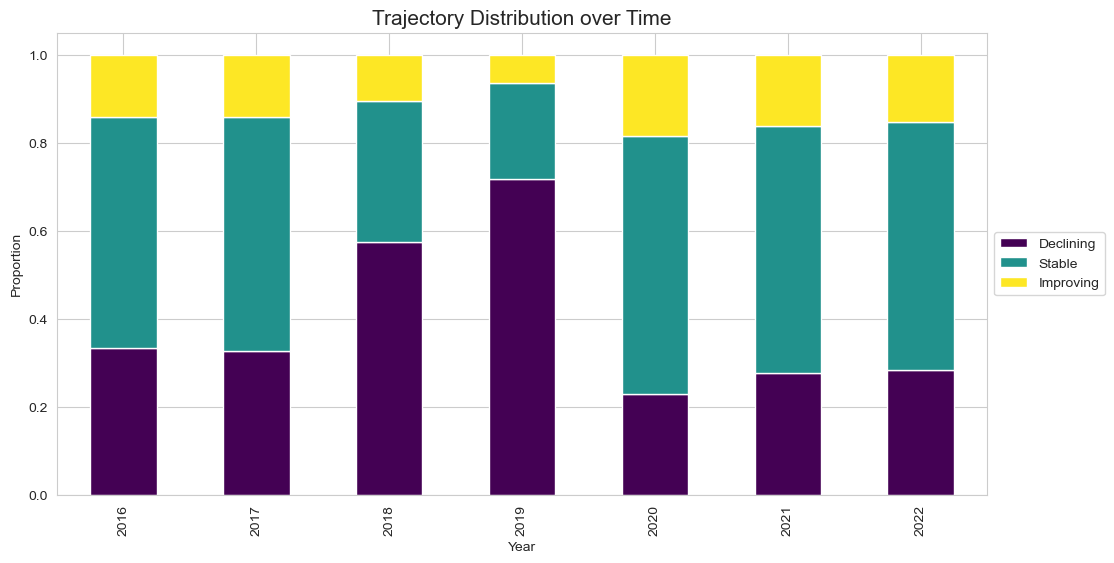

In [6]:
plt.figure(figsize=(12, 6))
ct = pd.crosstab(df['Year'], df['Target_Trajectory'], normalize='index')
ct = ct[['Declining', 'Stable', 'Improving']] # Reorder
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Trajectory Distribution over Time', fontsize=15)
plt.ylabel('Proportion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 6. Division Analysis
Are D1 schools more likely to be 'Improving' than D3?

<Figure size 1000x600 with 0 Axes>

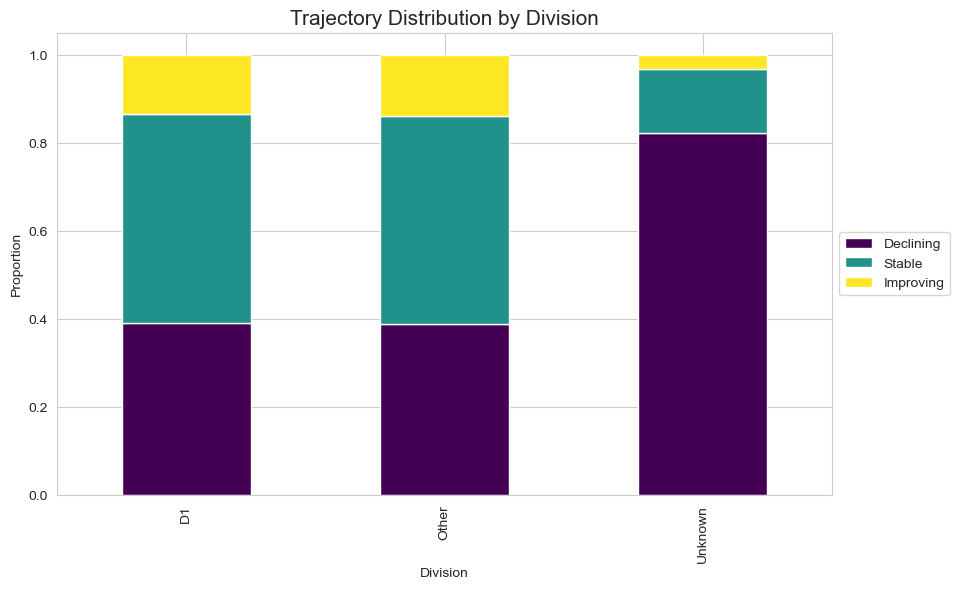

In [7]:
plt.figure(figsize=(10, 6))
ct_div = pd.crosstab(df['Division'], df['Target_Trajectory'], normalize='index')
ct_div = ct_div[['Declining', 'Stable', 'Improving']]
ct_div.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Trajectory Distribution by Division', fontsize=15)
plt.ylabel('Proportion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()